# Análise Exploratória de Dados (EDA) - Ocorrências Aeronáuticas

## Notebook 02 - Fase de Análise

**Objetivo:** Explorar o conjunto de dados unificado (`cenipa_master.csv`) para extrair insights visuais e estatísticos sobre as causas e características das ocorrências aeronáuticas no Brasil.

### 0. Instalação e Carregamento

Inicialmente, vamos instalar as bibliotecas e carregar nosso `DataFrame` mestre, inspecionando-o para garantir que os dados foram carregados corretamente.

In [1]:
# Instalação das bibliotecas
!pip install -q pandas matplotlib seaborn

# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

print("Bibliotecas importadas e ambiente configurado.")


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Bibliotecas importadas e ambiente configurado.


In [9]:
# Carregando o DataFrame mestre que preparamos
df = pd.read_csv('data/cenipa_master.csv', sep=';', encoding='utf-8')

print("DataFrame 'cenipa_master.csv' carregado com sucesso!")

# Inspeção inicial para garantir que tudo está correto
print("\nInformações do DataFrame:")
df.info()

print("\nVisualizando as 5 primeiras linhas:")
display(df.head())

DataFrame 'cenipa_master.csv' carregado com sucesso!

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21486 entries, 0 to 21485
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo_ocorrencia               21486 non-null  int64  
 1   ocorrencia_classificacao        21486 non-null  object 
 2   ocorrencia_latitude             18682 non-null  object 
 3   ocorrencia_longitude            18682 non-null  object 
 4   ocorrencia_cidade               21486 non-null  object 
 5   ocorrencia_uf                   21486 non-null  object 
 6   ocorrencia_pais                 21486 non-null  object 
 7   ocorrencia_aerodromo            21486 non-null  object 
 8   ocorrencia_dia                  21486 non-null  object 
 9   ocorrencia_hora                 21484 non-null  object 
 10  investigacao_aeronave_liberada  21486 non-null  object 
 11  investigacao_

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,BRASIL,FAER,11/05/2025,04:20:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,AVIÃO,EMBRAER,ERJ 190-400,NaN,NaN,61200.0,61200.0,0.0,2024.0,BRASIL,AVIÃO,NAO INFORMADO,VIRACOPOS,ORLANDO BEZERRA DE MENEZES,DESCIDA,REGULAR,NENHUM,0.0,NaN,NaN,NaN,NaN
1,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,BRASIL,SBUL,08/05/2025,14:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,AVIÃO,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),NaN,NaN,23000.0,23000.0,NaN,2024.0,BRASIL,AVIÃO,NAO INFORMADO,TENENTE-CORONEL AVIADOR CÉSAR BOMBONATO,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0.0,NaN,NaN,NaN,NaN
2,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,BRASIL,SBGR,09/05/2025,18:45:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,NaN,AIRBUS S.A.S.,A320-271N,NaN,BIMOTOR,79000.0,79000.0,NaN,NaN,BRASIL,NaN,NAO INFORMADO,GOVERNADOR ANDRÉ FRANCO MONTORO,PINTO MARTINS,DECOLAGEM,REGULAR,NENHUM,0.0,NaN,NaN,NaN,NaN
3,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,BRASIL,SBSM,04/05/2025,14:45:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,AVIÃO,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),TURBOÉLICE,BIMOTOR,22000.0,22000.0,0.0,2016.0,BRASIL,AVIÃO,NAO INFORMADO,SANTA MARIA,VIRACOPOS,DECOLAGEM,REGULAR,NENHUM,0.0,NaN,NaN,NaN,NaN
4,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,BRASIL,SBSR,10/05/2025,10:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,AVIÃO,AIRBUS,A320-214,JATO,BIMOTOR,77000.0,77000.0,184.0,2007.0,BRASIL,AVIÃO,NAO INFORMADO,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR ANDRÉ FRANCO MONTORO,DECOLAGEM,REGULAR,LEVE,0.0,NaN,NaN,NaN,NaN


## 1. Análise Univariada

Nesta seção, vamos analisar as variáveis individualmente para entender suas distribuições.

### 1.1. Distribuição da Classificação das Ocorrências

Começamos analisando a coluna `ocorrencia_classificacao` para entender a proporção de incidentes, incidentes graves e acidentes em nosso conjunto de dados.

Contagem de ocorrências por classificação:
ocorrencia_classificacao
INCIDENTE          9400
ACIDENTE           9393
INCIDENTE GRAVE    2693
Name: count, dtype: int64


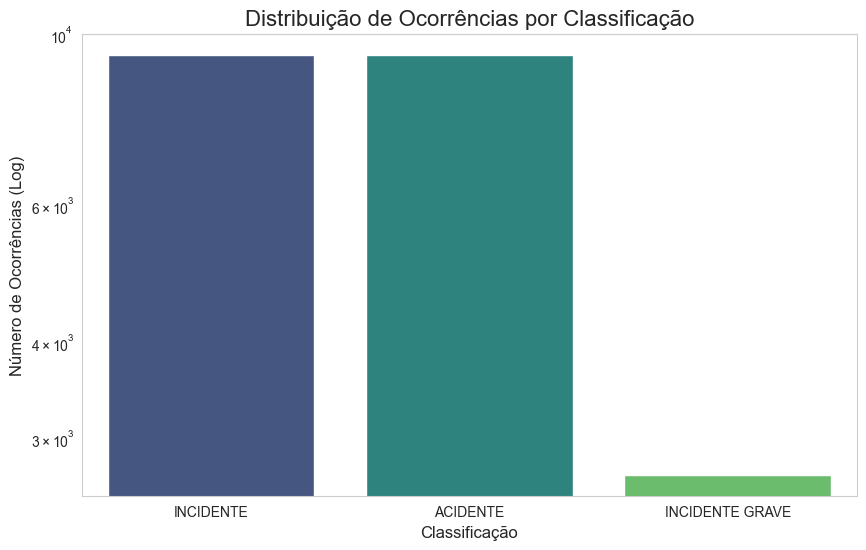

In [11]:
# Contando os valores na coluna de classificação
classificacao_counts = df['ocorrencia_classificacao'].value_counts()

print("Contagem de ocorrências por classificação:")
print(classificacao_counts)

# Criando a visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=classificacao_counts.index, y=classificacao_counts.values, palette='viridis', hue=classificacao_counts.index)
plt.title('Distribuição de Ocorrências por Classificação', fontsize=16)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Número de Ocorrências (Log)', fontsize=12)
plt.yscale('log') # Usando escala de log para melhor visualização das categorias menores
plt.show()

### 1.2. Análise Temporal das Ocorrências

Vamos analisar a evolução do número de ocorrências ao longo do tempo. Isso pode revelar tendências importantes, sazonalidades ou o impacto de eventos externos na segurança da aviação.

Para isso, primeiro precisamos garantir que nossa coluna de data seja tratada como tal, e não como texto.

Contagem de ocorrências por ano:
ano_ocorrencia
2007.0     359
2008.0     430
2009.0     380
2010.0     473
2011.0     421
2012.0     489
2013.0     419
2014.0     482
2015.0     383
2016.0     317
2017.0     417
2018.0     411
2019.0     401
2020.0     391
2021.0     501
2022.0     388
2023.0     600
2024.0    1213
2025.0     302
Name: count, dtype: int64


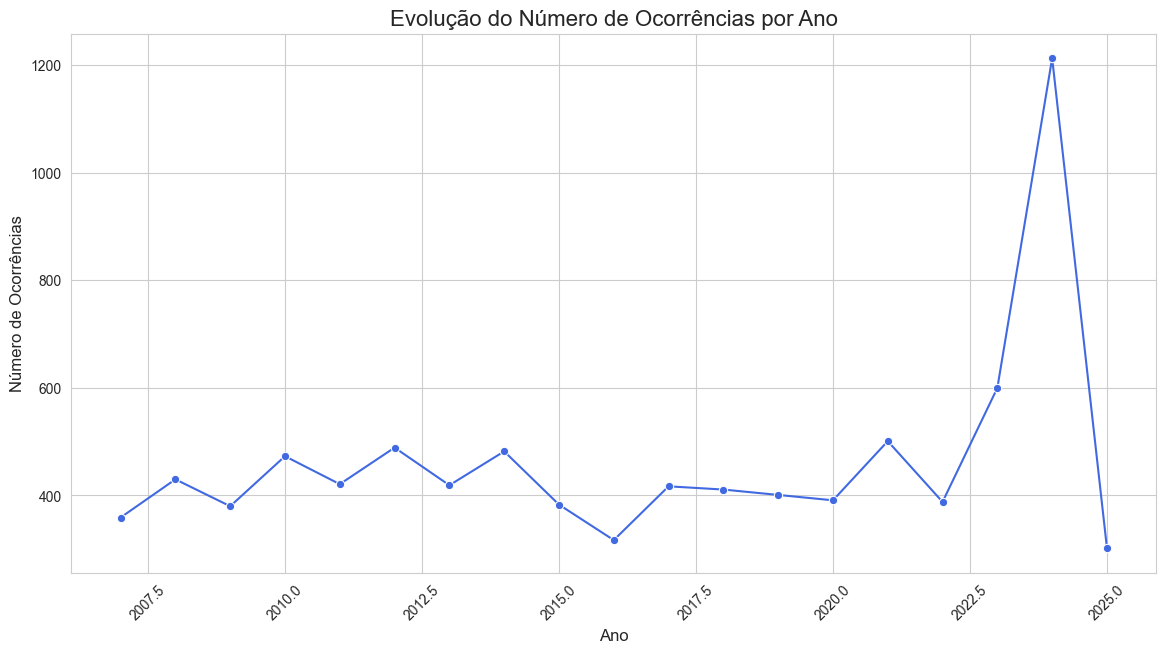

In [12]:
# 1. Convertendo a coluna 'ocorrencia_dia' para datetime
# Usamos errors='coerce' para transformar qualquer data inválida em Nulo (NaT)
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], errors='coerce')

# 2. Extraindo o ano da ocorrência para uma nova coluna
df['ano_ocorrencia'] = df['ocorrencia_dia'].dt.year

# 3. Contando as ocorrências por ano
ocorrencias_por_ano = df['ano_ocorrencia'].value_counts().sort_index()

print("Contagem de ocorrências por ano:")
print(ocorrencias_por_ano)

# 4. Criando a visualização
plt.figure(figsize=(14, 7))
sns.lineplot(x=ocorrencias_por_ano.index, y=ocorrencias_por_ano.values, marker='o', color='royalblue')
plt.title('Evolução do Número de Ocorrências por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 1.3. Composição das Ocorrências ao Longo do Tempo

A análise temporal revelou um pico significativo de ocorrências em 2024. A próxima pergunta natural é: o que compõe esse pico? Foi um aumento em todos os tipos de ocorrência (acidentes, incidentes, etc.) ou um tipo específico que cresceu desproporcionalmente?

Para investigar, vamos visualizar a evolução de cada classificação de ocorrência ano a ano.

Contagem de ocorrências por ano e classificação:


ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ano_ocorrencia,,,
2007.0,154,185,20
2008.0,274,116,40
2009.0,200,145,35
2010.0,233,151,89
2011.0,244,137,40
2012.0,280,127,82
2013.0,226,159,34
2014.0,223,147,112
2015.0,214,105,64


<Figure size 1400x800 with 0 Axes>

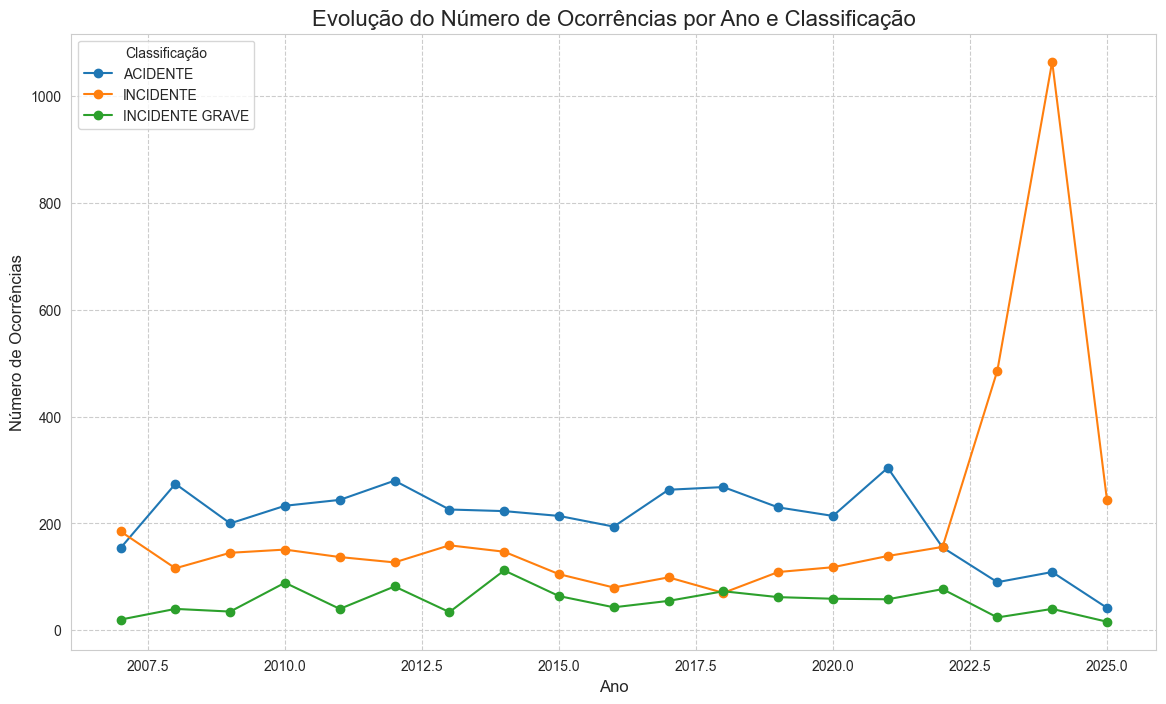

<Figure size 1400x800 with 0 Axes>

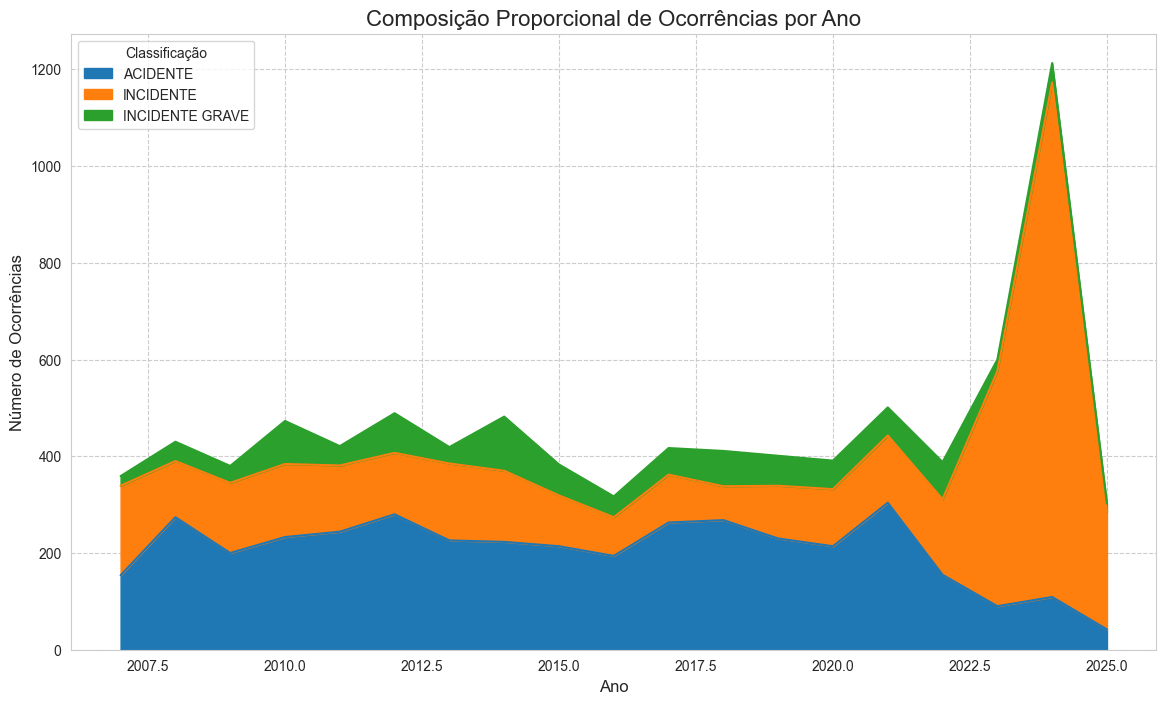

In [13]:
# 1. Agrupando os dados por ano e por classificação para obter a contagem
composicao_anual = df.groupby(['ano_ocorrencia', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

print("Contagem de ocorrências por ano e classificação:")
display(composicao_anual)


# 2. Criando a visualização
plt.figure(figsize=(14, 8))
composicao_anual.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('Evolução do Número de Ocorrências por Ano e Classificação', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.legend(title='Classificação')
plt.grid(True, which='both', linestyle='--')
plt.show()

# 3. Gráfico de área empilhada para ver a proporção
plt.figure(figsize=(14, 8))
composicao_anual.plot(kind='area', stacked=True, figsize=(14, 8))

plt.title('Composição Proporcional de Ocorrências por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.legend(title='Classificação')
plt.grid(True, which='both', linestyle='--')
plt.show()

### 1.4. Investigação do Pico de Ocorrências em 2024

A análise temporal revelou um aumento abrupto e significativo no número de ocorrências em 2024, concentrado quase exclusivamente na categoria `INCIDENTE`. Uma pesquisa de contexto foi realizada para entender este fenômeno.

**Conclusão da Investigação:**

O aumento está fortemente correlacionado com mudanças regulatórias e de infraestrutura de reporte, e não necessariamente com uma degradação da segurança aérea. Os principais fatores são:

1.  **Nova Regulamentação (Resolução nº 714 da ANAC):** Aprovada em abril de 2023, expandiu a obrigatoriedade de reportes de segurança operacional.
2.  **Portal Único de Notificação do CENIPA:** A implementação final deste portal, especialmente a fase de 1º de junho de 2024 que incluiu "demais organizações e profissionais", tornou o processo de notificação mais fácil e mandatório para um público muito maior.

Portanto, o pico de **incidentes** em 2024 é interpretado como um reflexo positivo de uma maior adesão à cultura de segurança e de melhorias no sistema de notificação, e não como um aumento real na periculosidade das operações aéreas. Esta compreensão é crucial para qualquer análise de tendência futura.

## 2. Análise Geográfica

Nesta seção, vamos analisar a distribuição espacial das ocorrências para identificar estados ou regiões com maior concentração de eventos.

Contagem de ocorrências por UF:
ocorrencia_uf
SP     5032
RJ     1723
MG     1540
PR     1513
RS     1426
MT     1241
PA     1154
GO     1135
BA     1104
AM      838
SC      654
PE      598
MS      583
DF      540
CE      362
MA      347
RR      298
ES      236
TO      218
PI      195
AC      150
RO      137
AL      132
SE       93
PB       83
RN       77
AP       54
***      23
Name: count, dtype: int64


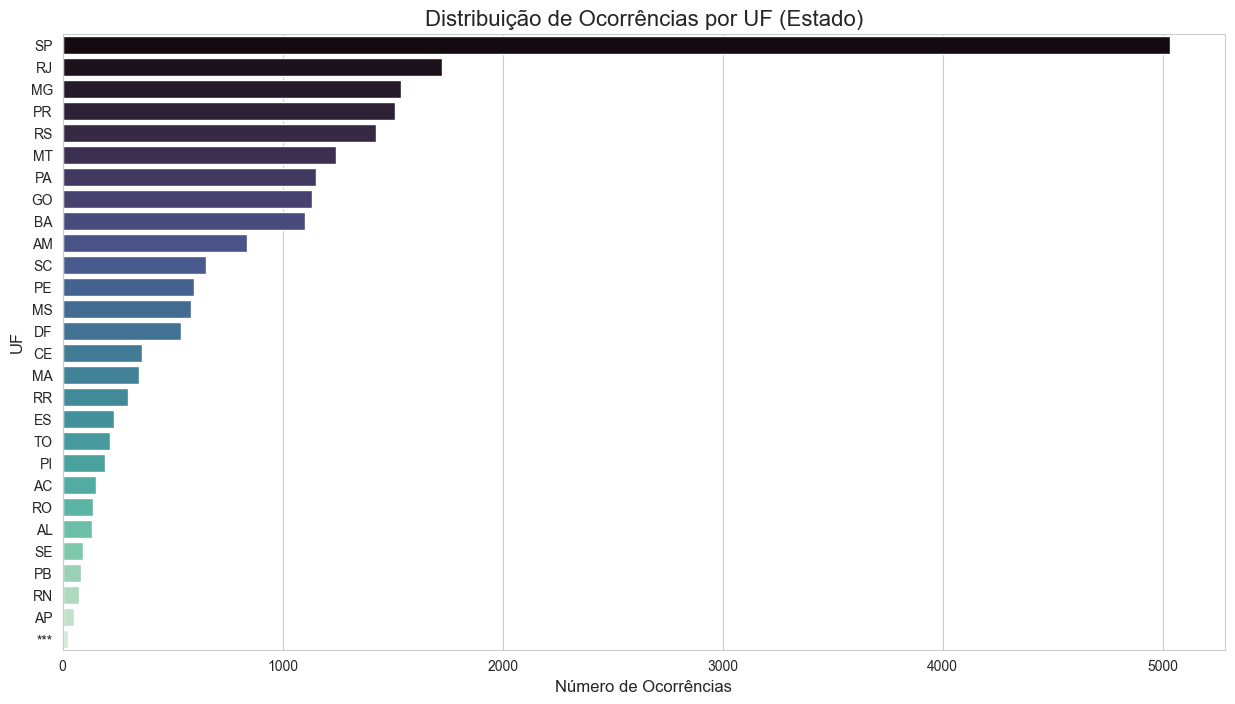

In [16]:
# Contando as ocorrências por UF (Estado)
ocorrencias_por_uf = df['ocorrencia_uf'].value_counts()

print("Contagem de ocorrências por UF:")
# Exibindo os 10 primeiros para ter uma ideia
print(ocorrencias_por_uf.head(28))

# Criando a visualização
plt.figure(figsize=(15, 8))
sns.barplot(y=ocorrencias_por_uf.index, x=ocorrencias_por_uf.values, palette='mako', hue=ocorrencias_por_uf.index, legend=False)
plt.title('Distribuição de Ocorrências por UF (Estado)', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.show()

### 2.1. Análise Proporcional da Classificação por UF

A análise do número absoluto de ocorrências mostrou uma forte concentração em estados com maior tráfego aéreo, como São Paulo. Uma análise mais aprofundada requer a normalização desses dados.

Como um primeiro passo nessa direção, vamos analisar a **composição percentual** das ocorrências (`ACIDENTE`, `INCIDENTE`, `INCIDENTE GRAVE`) dentro de cada estado. Isso nos permitirá comparar se a "gravidade" dos eventos é diferente entre os estados, independentemente do volume total.

Composição Percentual de Ocorrências nos 10 principais estados:


ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ocorrencia_uf,,,
SP,39.964229,50.814785,9.220986
RJ,22.692977,65.293093,12.013929
MG,38.441558,49.025974,12.532468
PR,44.150694,43.291474,12.557832
RS,59.467041,28.821879,11.711080
MT,71.877518,17.808219,10.314263
PA,54.852686,28.336222,16.811092
GO,51.453744,27.929515,20.616740
BA,45.471014,40.760870,13.768116


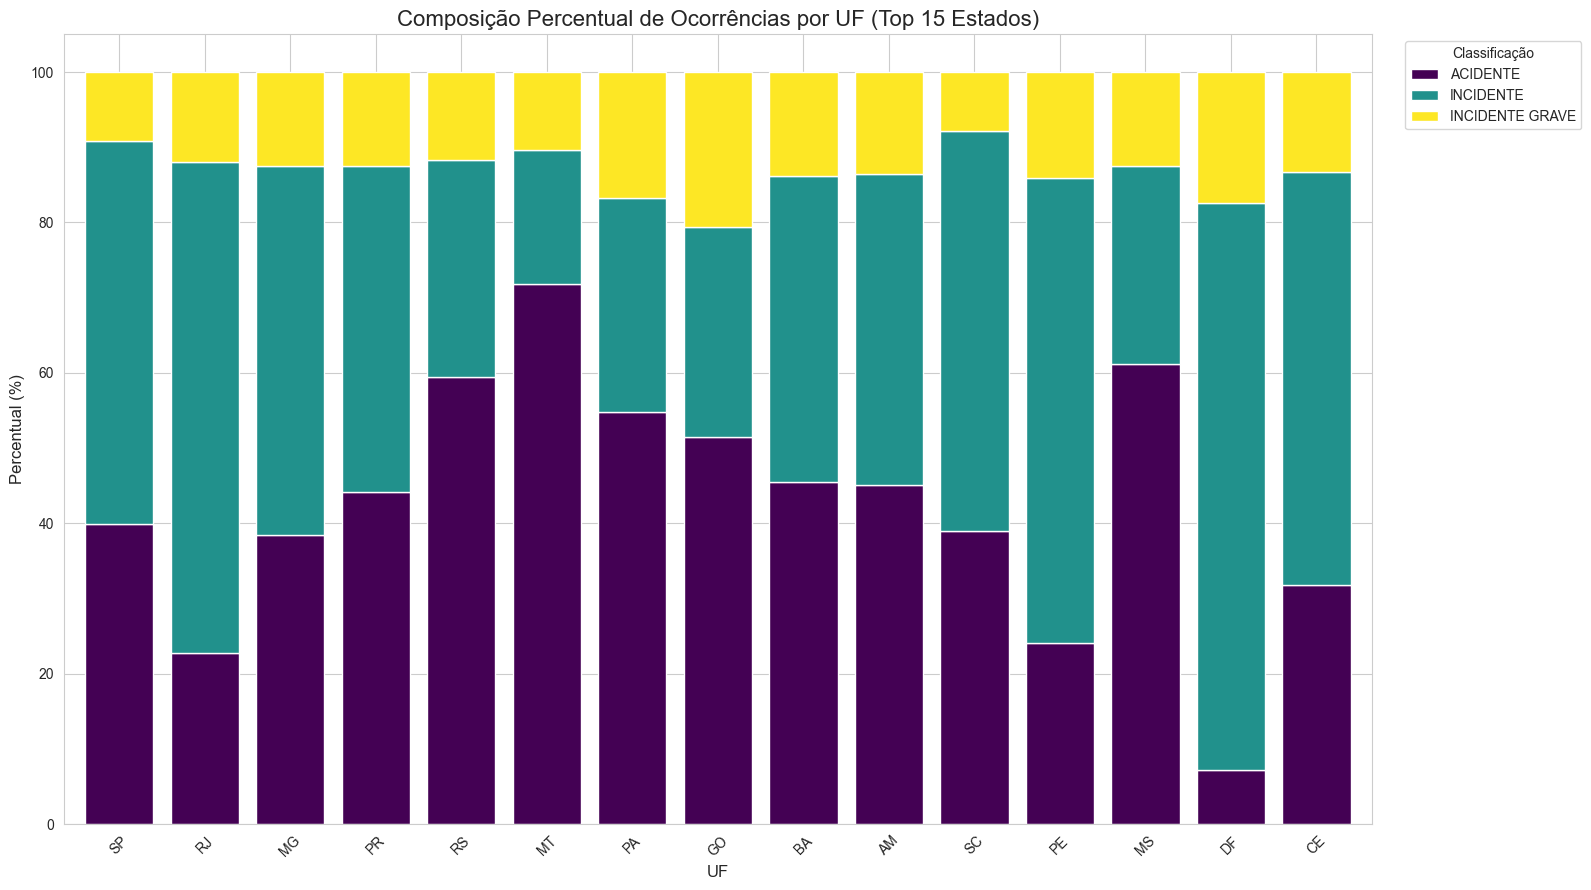

In [17]:
# 1. Agrupando por UF e Classificação
composicao_uf = df.groupby(['ocorrencia_uf', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

# 2. Calculando o total por UF para normalizar
total_por_uf = composicao_uf.sum(axis=1)

# 3. Calculando a proporção (percentual)
composicao_percentual_uf = composicao_uf.div(total_por_uf, axis=0) * 100

print("Composição Percentual de Ocorrências nos 10 principais estados:")
# Ordenando pelo total de ocorrências para visualizar os mais relevantes
display(composicao_percentual_uf.loc[ocorrencias_por_uf.head(10).index])


# 4. Criando a visualização (gráfico de barras 100% empilhado)
# Vamos focar nos 15 estados com mais ocorrências para uma melhor visualização
top_15_uf = ocorrencias_por_uf.head(15).index
composicao_percentual_uf.loc[top_15_uf].plot(
    kind='bar',
    stacked=True,
    figsize=(16, 9),
    colormap='viridis',
    width=0.8
)

plt.title('Composição Percentual de Ocorrências por UF (Top 15 Estados)', fontsize=16)
plt.xlabel('UF', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classificação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. Análise por Segmento da Aviação

Nossa análise geográfica levantou a hipótese de que o tipo de operação aérea (comercial, agrícola, particular) influencia diretamente na gravidade das ocorrências.

Nesta seção, vamos investigar a relação entre o `aeronave_registro_segmento` e a `ocorrencia_classificacao` para validar essa hipótese.

Composição Percentual de Ocorrências por Segmento:


ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_registro_segmento,,,
ADMINISTRAÇÃO DIRETA,50.674663,28.935532,20.389805
ADMINISTRAÇÃO INDIRETA,42.647059,19.117647,38.235294
AGRÍCOLA,88.120679,3.834067,8.045255
ESPECIALIZADA,73.091603,16.030534,10.877863
EXPERIMENTAL,74.338320,12.313003,13.348677
HISTÓRICA,66.666667,33.333333,0.000000
INSTRUÇÃO,57.521463,23.814856,18.663680
MÚLTIPLA,66.315789,25.263158,8.421053
NAO INFORMADO,10.148108,84.229292,5.622600


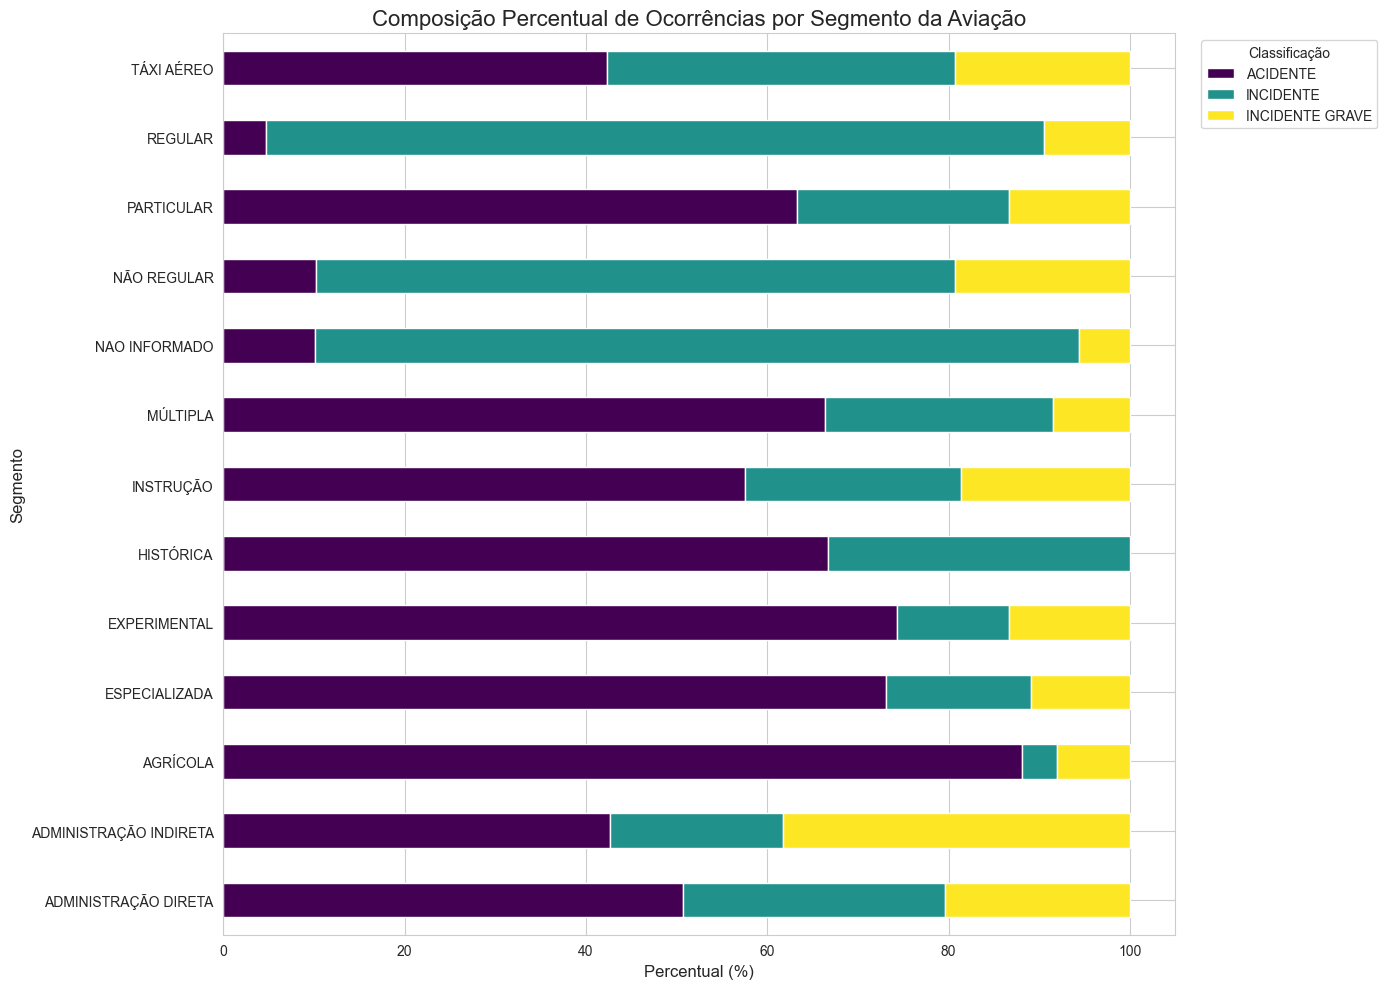

In [18]:
# 1. Agrupando por Segmento e Classificação
composicao_segmento = df.groupby(['aeronave_registro_segmento', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

# 2. Calculando a proporção percentual
composicao_percentual_segmento = composicao_segmento.div(composicao_segmento.sum(axis=1), axis=0) * 100

print("Composição Percentual de Ocorrências por Segmento:")
display(composicao_percentual_segmento)

# 3. Criando a visualização
composicao_percentual_segmento.plot(
    kind='barh', # Gráfico de barras horizontais para melhor leitura
    stacked=True,
    figsize=(14, 10),
    colormap='viridis'
)

plt.title('Composição Percentual de Ocorrências por Segmento da Aviação', fontsize=16)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Segmento', fontsize=12)
plt.legend(title='Classificação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4. Análise dos Fatores Contribuintes por Segmento

A análise anterior estabeleceu uma forte correlação entre o segmento da aviação e a gravidade das ocorrências. Agora, vamos aprofundar para entender se os **fatores contribuintes** (as causas) também variam entre os segmentos mais críticos.

Vamos comparar os principais fatores contribuintes para os segmentos **AGRÍCOLA** e **PARTICULAR** (alto risco) com o segmento **REGULAR** (baixo risco de acidentes).

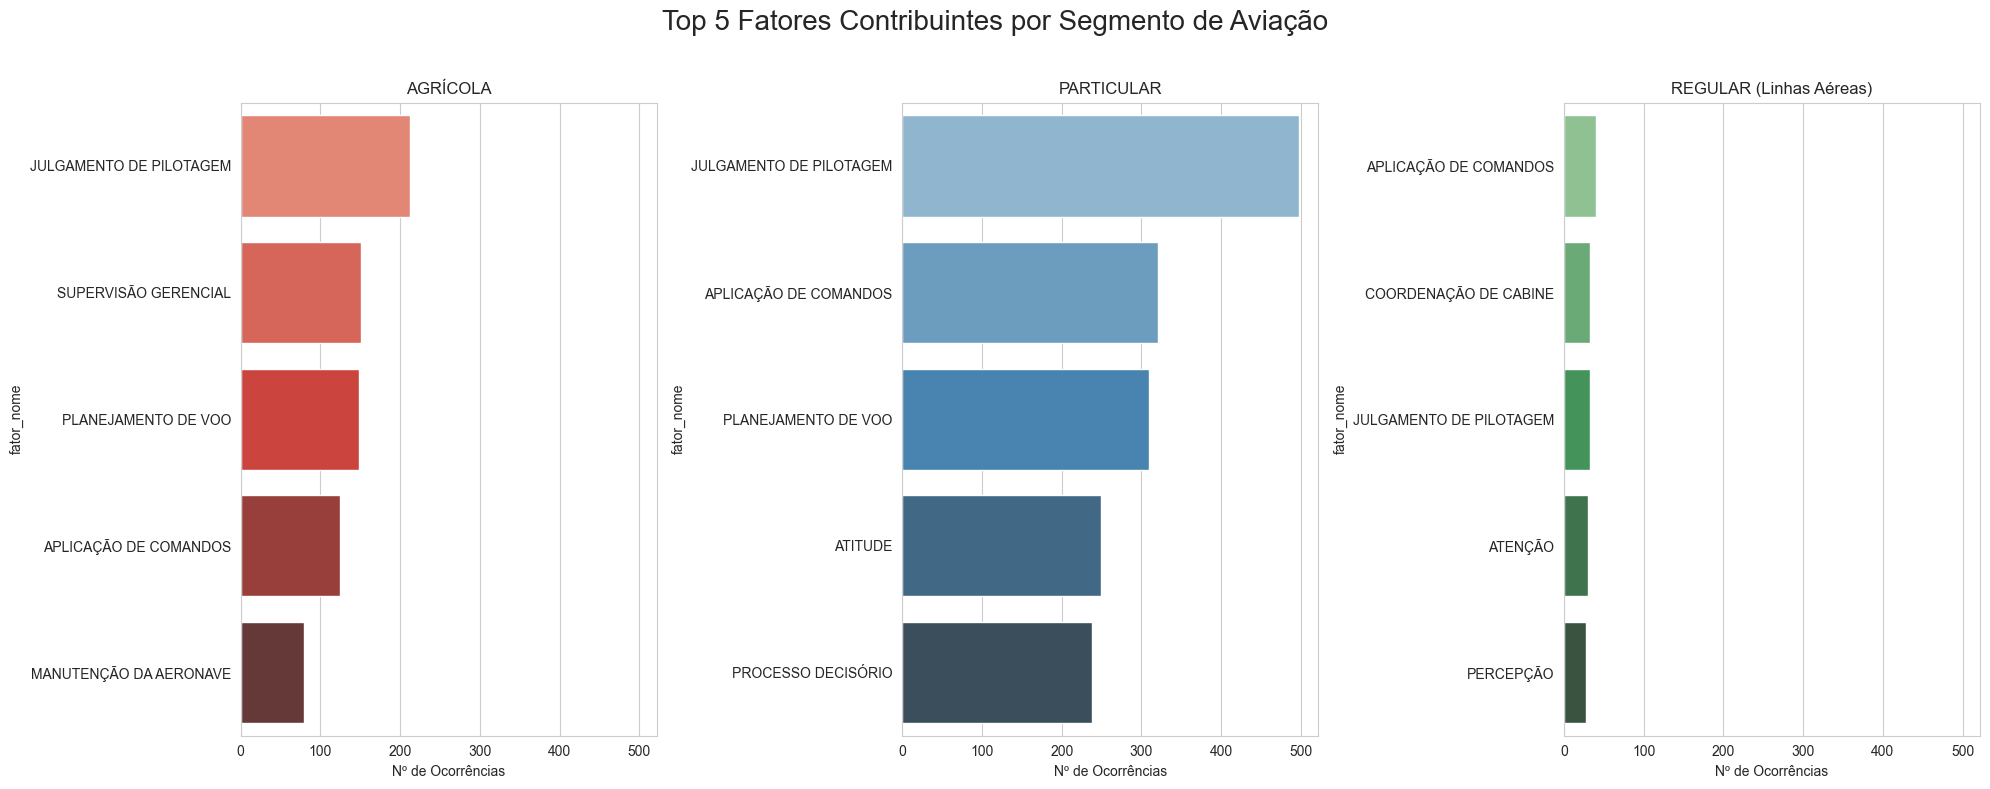

In [19]:
# Filtrando o DataFrame para os segmentos de interesse
df_agricola = df[df['aeronave_registro_segmento'] == 'AGRÍCOLA']
df_particular = df[df['aeronave_registro_segmento'] == 'PARTICULAR']
df_regular = df[df['aeronave_registro_segmento'] == 'REGULAR']

# Contando os top 5 fatores para cada segmento
top_fatores_agricola = df_agricola['fator_nome'].value_counts().nlargest(5)
top_fatores_particular = df_particular['fator_nome'].value_counts().nlargest(5)
top_fatores_regular = df_regular['fator_nome'].value_counts().nlargest(5)

# Criando a visualização
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True)
fig.suptitle('Top 5 Fatores Contribuintes por Segmento de Aviação', fontsize=20)

# Gráfico para Aviação Agrícola
sns.barplot(ax=axes[0], y=top_fatores_agricola.index, x=top_fatores_agricola.values, palette='Reds_d', hue=top_fatores_agricola.index, legend=False)
axes[0].set_title('AGRÍCOLA')
axes[0].set_xlabel('Nº de Ocorrências')

# Gráfico para Aviação Particular
sns.barplot(ax=axes[1], y=top_fatores_particular.index, x=top_fatores_particular.values, palette='Blues_d', hue=top_fatores_particular.index, legend=False)
axes[1].set_title('PARTICULAR')
axes[1].set_xlabel('Nº de Ocorrências')

# Gráfico para Aviação Regular
sns.barplot(ax=axes[2], y=top_fatores_regular.index, x=top_fatores_regular.values, palette='Greens_d', hue=top_fatores_regular.index, legend=False)
axes[2].set_title('REGULAR (Linhas Aéreas)')
axes[2].set_xlabel('Nº de Ocorrências')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4.1. Análise Comparativa: Fatores Contribuintes em Segmentos de Alto vs. Baixo Risco

A análise anterior, focada em três segmentos, foi um bom ponto de partida. No entanto, uma observação mais atenta ao gráfico de composição mostrou que vários outros segmentos (como `EXPERIMENTAL` e `ESPECIALIZADA`) também possuem uma alta proporção de acidentes.

Para criar uma comparação mais abrangente e significativa, vamos agora agrupar os segmentos em duas categorias baseadas no risco de acidente:

* **Grupo de Alto Risco:** Todos os segmentos onde a proporção de `ACIDENTE` é superior a 50%.
* **Grupo de Baixo Risco:** O segmento `REGULAR`, que possui uma proporção muito baixa de acidentes e serve como nossa base de comparação (baseline).

O objetivo é comparar os principais fatores contribuintes para cada um desses dois grandes grupos, buscando entender se as *causas* dos eventos são fundamentalmente diferentes entre a aviação geral (alto risco) e a aviação comercial (baixo risco).

Segmentos definidos como 'Alto Risco' (Acidentes > 50%):
['ADMINISTRAÇÃO DIRETA', 'AGRÍCOLA', 'ESPECIALIZADA', 'EXPERIMENTAL', 'HISTÓRICA', 'INSTRUÇÃO', 'MÚLTIPLA', 'PARTICULAR']


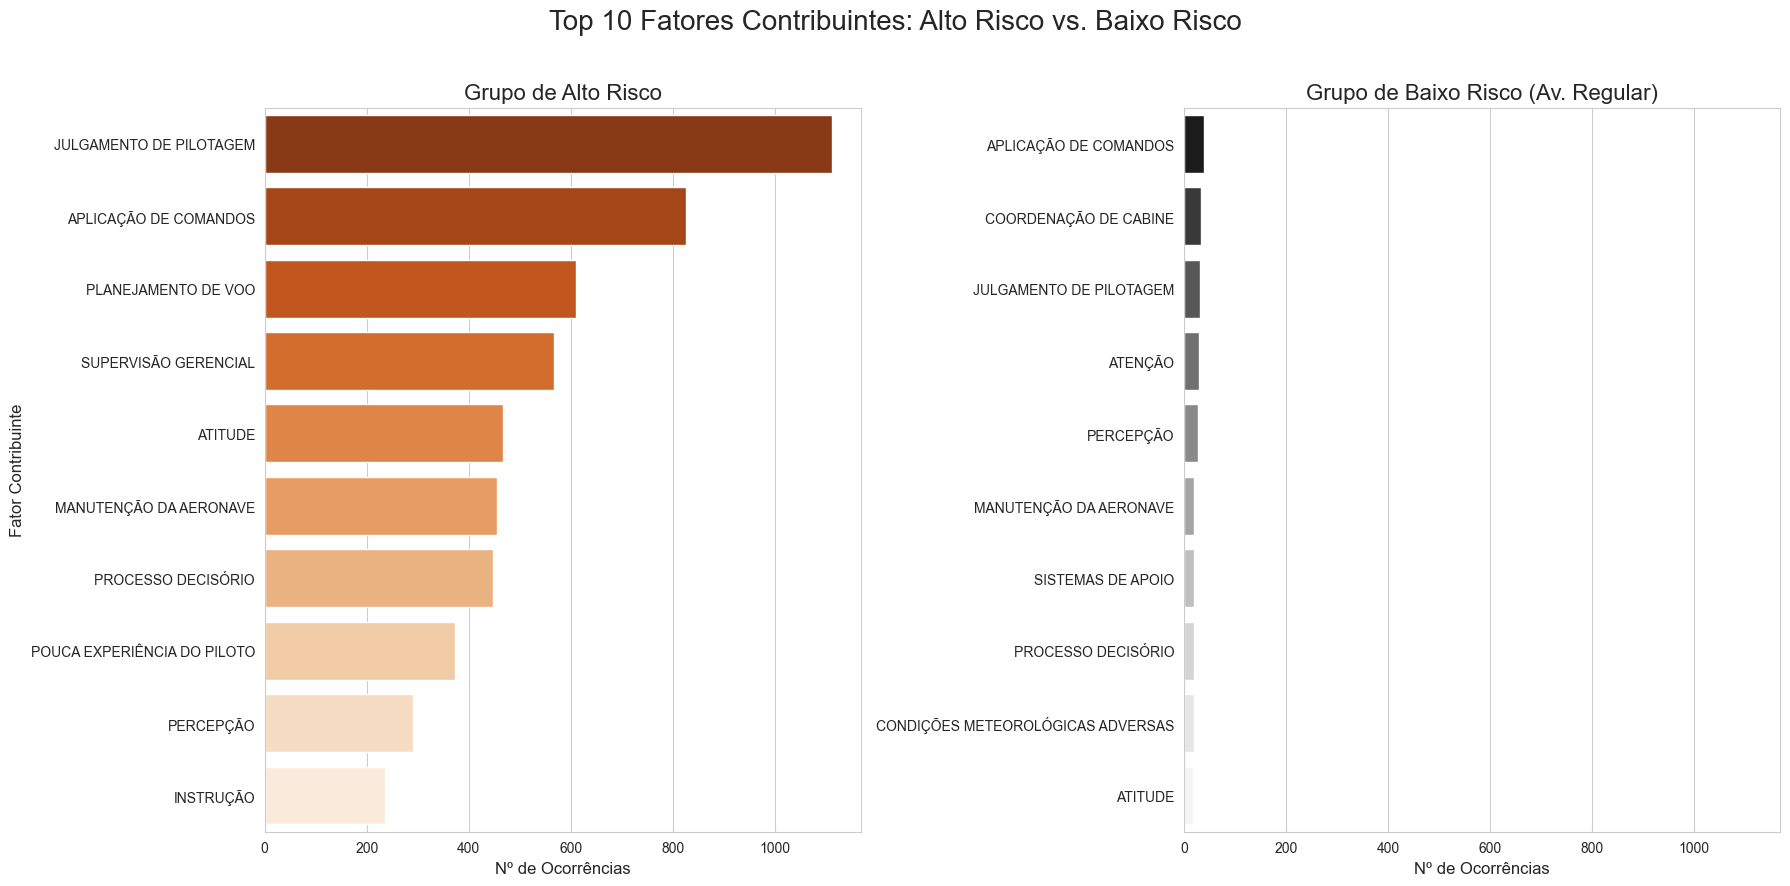

In [20]:
# 1. Identificar os segmentos de alto risco a partir da tabela de composição que já calculamos
segmentos_alto_risco = composicao_percentual_segmento[composicao_percentual_segmento['ACIDENTE'] > 50].index.tolist()

print("Segmentos definidos como 'Alto Risco' (Acidentes > 50%):")
print(segmentos_alto_risco)

# 2. Criar os dois DataFrames de grupo
df_alto_risco = df[df['aeronave_registro_segmento'].isin(segmentos_alto_risco)]
df_baixo_risco = df[df['aeronave_registro_segmento'] == 'REGULAR']

# 3. Calcular os top 10 fatores para cada grupo
top_fatores_alto_risco = df_alto_risco['fator_nome'].value_counts().nlargest(10)
top_fatores_baixo_risco = df_baixo_risco['fator_nome'].value_counts().nlargest(10)


# 4. Criando a visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(18, 9), sharex=True)
fig.suptitle('Top 10 Fatores Contribuintes: Alto Risco vs. Baixo Risco', fontsize=20)

# Gráfico para Grupo de Alto Risco
sns.barplot(ax=axes[0], y=top_fatores_alto_risco.index, x=top_fatores_alto_risco.values, palette='Oranges_r', hue=top_fatores_alto_risco.index, legend=False)
axes[0].set_title('Grupo de Alto Risco', fontsize=16)
axes[0].set_xlabel('Nº de Ocorrências', fontsize=12)
axes[0].set_ylabel('Fator Contribuinte', fontsize=12)


# Gráfico para Grupo de Baixo Risco
sns.barplot(ax=axes[1], y=top_fatores_baixo_risco.index, x=top_fatores_baixo_risco.values, palette='Greys_r', hue=top_fatores_baixo_risco.index, legend=False)
axes[1].set_title('Grupo de Baixo Risco (Av. Regular)', fontsize=16)
axes[1].set_xlabel('Nº de Ocorrências', fontsize=12)
axes[1].set_ylabel('') # Remover o label Y para não poluir

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. Análise por Fase da Operação

Uma das análises mais clássicas e importantes na segurança de voo é identificar em qual fase da operação (pouso, decolagem, cruzeiro, etc.) as ocorrências são mais comuns. Esta análise nos ajuda a entender onde os riscos se concentram durante um voo típico.

Contagem de ocorrências por Fase de Operação (Top 15):
aeronave_fase_operacao
POUSO                  4157
DECOLAGEM              3813
CRUZEIRO               3041
CORRIDA APÓS POUSO     1921
SUBIDA                 1327
APROXIMAÇÃO FINAL      1277
MANOBRA                1035
TÁXI                    994
DESCIDA                 593
ESPECIALIZADA           452
INDETERMINADA           390
CIRCUITO DE TRÁFEGO     372
OUTRA FASE              354
ESTACIONAMENTO          330
VOO A BAIXA ALTURA      282
Name: count, dtype: int64


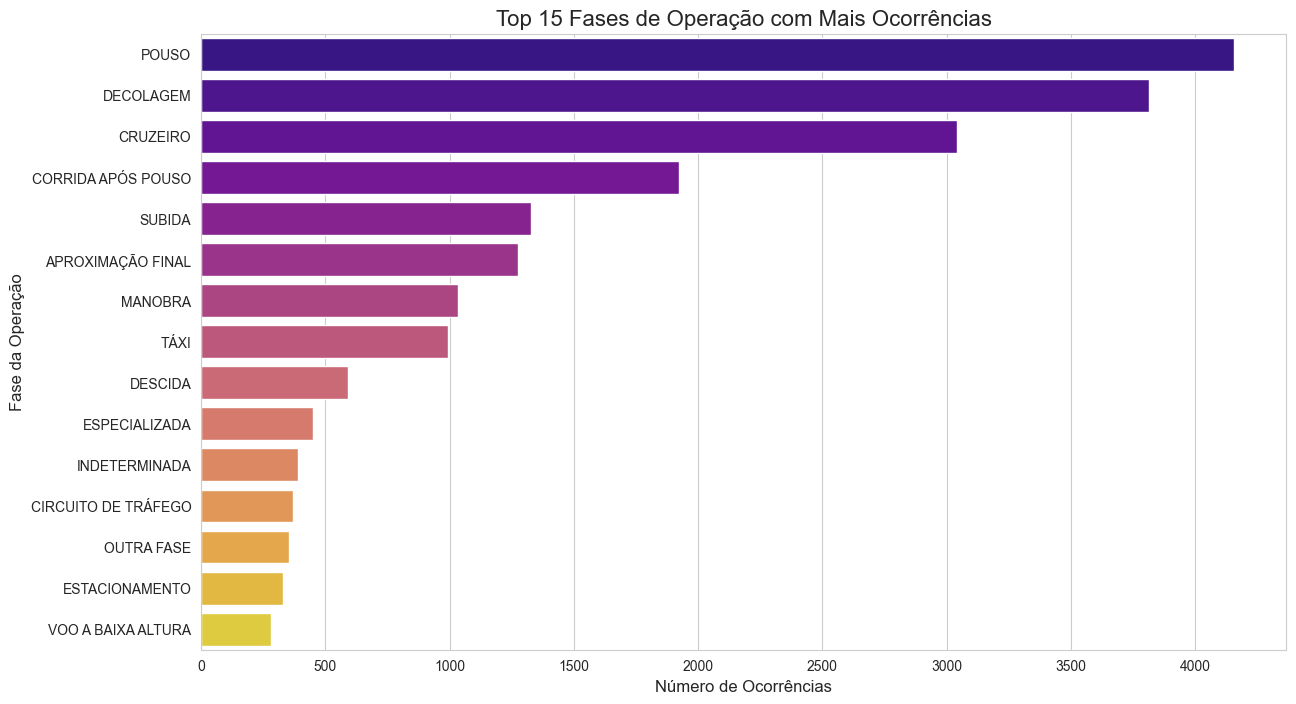

In [21]:
# Contando as ocorrências por fase de operação
fase_operacao_counts = df['aeronave_fase_operacao'].value_counts().nlargest(15)

print("Contagem de ocorrências por Fase de Operação (Top 15):")
print(fase_operacao_counts)

# Criando a visualização
plt.figure(figsize=(14, 8))
sns.barplot(y=fase_operacao_counts.index, x=fase_operacao_counts.values, palette='plasma', hue=fase_operacao_counts.index, legend=False)
plt.title('Top 15 Fases de Operação com Mais Ocorrências', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Fase da Operação', fontsize=12)
plt.show()

## 6. Conclusão da Análise Exploratória (EDA) e Direcionamento para a Modelagem

Ao final desta fase de exploração, construímos um entendimento profundo sobre o ecossistema das ocorrências aeronáuticas no Brasil. Através de uma análise minuciosa, obtivemos insights valiosos que nos ajudam a compreender as tendências temporais, os riscos regionais, os fatores críticos por segmento e as fases mais perigosas do voo.

Entre os principais achados, destacam-se: o impacto da regulação de 2024 na explosão de notificações de `INCIDENTE`; a desigual distribuição geográfica do risco, com maior gravidade nas regiões dominadas por aviação agrícola e geral; o papel central do `aeronave_registro_segmento` na gravidade das ocorrências; a diferença marcante entre os fatores causadores na aviação geral e comercial; e a confirmação de que pousos e decolagens continuam sendo as fases mais críticas do voo.

Com base nesses insights, foram consideradas duas abordagens possíveis para a fase de modelagem preditiva:

1. **Previsão de Quantidade (Forecasting):** Estimar o número de ocorrências futuras.
2. **Previsão de Gravidade (Classificação):** Estimar a gravidade de uma ocorrência com base em suas características.

### Decisão Estratégica

A abordagem escolhida foi a **Previsão de Gravidade (Classificação)**. Essa decisão se fundamenta em três fatores principais:

* **Riqueza dos Dados:** A EDA demonstrou correlações significativas entre variáveis como `aeronave_registro_segmento`, `aeronave_fase_operacao` e a gravidade das ocorrências, o que favorece a construção de um modelo robusto de classificação.
* **Robustez Estatística:** A série temporal sofreu uma ruptura em 2024 devido à mudança no sistema de notificações. Isso compromete a confiabilidade de modelos de forecasting, mas tem impacto reduzido em modelos de classificação baseados em características do evento.
* **Valor Prático:** Um modelo que antecipa a gravidade potencial de uma ocorrência com base nas suas características iniciais tem aplicabilidade direta na gestão de risco e segurança operacional.

Dessa forma, o próximo passo será construir um modelo de Machine Learning capaz de classificar uma ocorrência como **"Grave"** (Acidente / Incidente Grave) ou **"Não Grave"** (Incidente) com base nas informações disponíveis no momento do reporte. Essa modelagem será conduzida no notebook `03_Modelagem_Preditiva_CENIPA.ipynb`.
